<a href="https://colab.research.google.com/github/12345423/ABD_IrhamBagusJ_233_Tugas1/blob/main/Tugas1_OULAD_202010370311233_Irham_Bagus_J.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assesments

In [10]:
# Membaca file data dari CSV dan disimpan dalam dataframe
df = pd.read_csv('assessments.csv')

# Fungsi DataFrame untuk menampilkan data dari urutan paling atas, fungsi ini berguna untuk memeriksa struktur data

df.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [11]:
# Menampilkan ringkasan informasi terkait  dataframe yang digunakan, berguna untuk memahami struktur dan spesifikasi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [12]:
# Mengisi missing values dengan perulangan loop dan diisi dengan mode dari setiap kolom
for col in df.columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
print(df.isnull().sum())

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64


In [13]:
# Menampilkan tipe dan struktur data guna mempermudah mengolah data
print(f"Data Types:\n{df.dtypes}")
print(f"\nRows and Columns:\n{df.shape}")
print(f"\nColumn Names:\n{df.columns}")
print(f"\nNull Values %:\n{df.apply(lambda x: sum(x.isnull()) / len(df))}")

Data Types:
code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

Rows and Columns:
(206, 6)

Column Names:
Index(['code_module', 'code_presentation', 'id_assessment', 'assessment_type',
       'date', 'weight'],
      dtype='object')

Null Values %:
code_module          0.0
code_presentation    0.0
id_assessment        0.0
assessment_type      0.0
date                 0.0
weight               0.0
dtype: float64


In [14]:
# Membagi kolom kolom pada dataframe menjadi 4 kategori berdasarkan tipe datanya
temp = (df.dtypes == 'object')
cat_cols = list(temp[temp].index)
print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")

temp = (df.dtypes == 'float64')
float64_cols = list(temp[temp].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

temp = (df.dtypes == 'int64')
int64_cols = list(temp[temp].index)
print(f"\n{len(int64_cols)} int features:\n{int64_cols}")

temp = (df.dtypes == np.number)
num_cols = list(temp[temp].index)
print(f"\n{len(num_cols)} numpy.number features::\n{num_cols}")

#Hasil dari kode ini adalah pengelompokan kolom dalam DataFrame ke dalam kategori berdasarkan jenis data mereka, yang dapat membantu dalam analisis dan pemrosesan data yang lebih lanjut.

3 Categorical features:
['code_module', 'code_presentation', 'assessment_type']

2 float64 features:
['date', 'weight']

1 int features:
['id_assessment']

2 numpy.number features::
['date', 'weight']


# COURSES

In [44]:
# Membaca file data dari CSV dan disimpan dalam dataframe
df = pd.read_csv('courses.csv')

# Fungsi DataFrame untuk menampilkan data dari urutan paling atas, fungsi ini berguna untuk memeriksa struktur data
df.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [45]:
# Menampilkan ringkasan informasi terkait  dataframe yang digunakan, berguna untuk memahami struktur dan spesifikasi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [46]:
# Menampilkan tipe dan struktur data guna mempermudah mengolah data
print(f"Data Types:\n{df.dtypes}")
print(f"\nRows and Columns:\n{df.shape}")
print(f"\nColumn Names:\n{df.columns}")
print(f"\nNull Values %:\n{df.apply(lambda x: sum(x.isnull()) / len(df))}")

Data Types:
code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object

Rows and Columns:
(22, 3)

Column Names:
Index(['code_module', 'code_presentation', 'module_presentation_length'], dtype='object')

Null Values %:
code_module                   0.0
code_presentation             0.0
module_presentation_length    0.0
dtype: float64


In [47]:
# Membagi kolom kolom pada dataframe menjadi 4 kategori berdasarkan tipe datanya
temp = (df.dtypes == 'object')
cat_cols = list(temp[temp].index)
print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")

temp = (df.dtypes == 'float64')
float64_cols = list(temp[temp].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

temp = (df.dtypes == 'int64')
int64_cols = list(temp[temp].index)
print(f"\n{len(int64_cols)} int features:\n{int64_cols}")

temp = (df.dtypes == np.number)
num_cols = list(temp[temp].index)
print(f"\n{len(num_cols)} numpy.number features::\n{num_cols}")

# Hasil dari kode ini adalah pengelompokan kolom dalam DataFrame ke dalam kategori berdasarkan jenis data mereka, yang dapat membantu dalam analisis dan pemrosesan data yang lebih lanjut.

2 Categorical features:
['code_module', 'code_presentation']

0 float64 features:
[]

1 int features:
['module_presentation_length']

0 numpy.number features::
[]


# studentAssessments

In [22]:
# Membaca file data dari CSV dan disimpan dalam dataframe
df = pd.read_csv('studentAssessment.csv')

# Fungsi DataFrame untuk menampilkan data dari urutan paling atas, fungsi ini berguna untuk memeriksa struktur data
df.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [23]:
# Menampilkan ringkasan informasi terkait  dataframe yang digunakan, berguna untuk memahami struktur dan spesifikasi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [24]:
# Mengisi missing values dengan perulangan loop dan diisi dengan mode dari setiap kolom
for col in df.columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
print(df.isnull().sum())

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64


In [25]:
# Menampilkan tipe dan struktur data guna mempermudah mengolah data
print(f"Data Types:\n{df.dtypes}")
print(f"\nRows and Columns:\n{df.shape}")
print(f"\nColumn Names:\n{df.columns}")
print(f"\nNull Values %:\n{df.apply(lambda x: sum(x.isnull()) / len(df))}")

Data Types:
id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object

Rows and Columns:
(173912, 5)

Column Names:
Index(['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score'], dtype='object')

Null Values %:
id_assessment     0.0
id_student        0.0
date_submitted    0.0
is_banked         0.0
score             0.0
dtype: float64


In [27]:
# Membagi kolom kolom pada dataframe menjadi 4 kategori berdasarkan tipe datanya
temp = (df.dtypes == 'object')
cat_cols = list(temp[temp].index)
print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")

temp = (df.dtypes == 'float64')
float64_cols = list(temp[temp].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

temp = (df.dtypes == 'int64')
int64_cols = list(temp[temp].index)
print(f"\n{len(int64_cols)} int features:\n{int64_cols}")

temp = (df.dtypes == np.number)
num_cols = list(temp[temp].index)
print(f"\n{len(num_cols)} numpy.number features::\n{num_cols}")
# Hasil dari kode ini adalah pengelompokan kolom dalam DataFrame ke dalam kategori berdasarkan jenis data mereka, yang dapat membantu dalam analisis dan pemrosesan data yang lebih lanjut.

0 Categorical features:
[]

1 float64 features:
['score']

4 int features:
['id_assessment', 'id_student', 'date_submitted', 'is_banked']

1 numpy.number features::
['score']


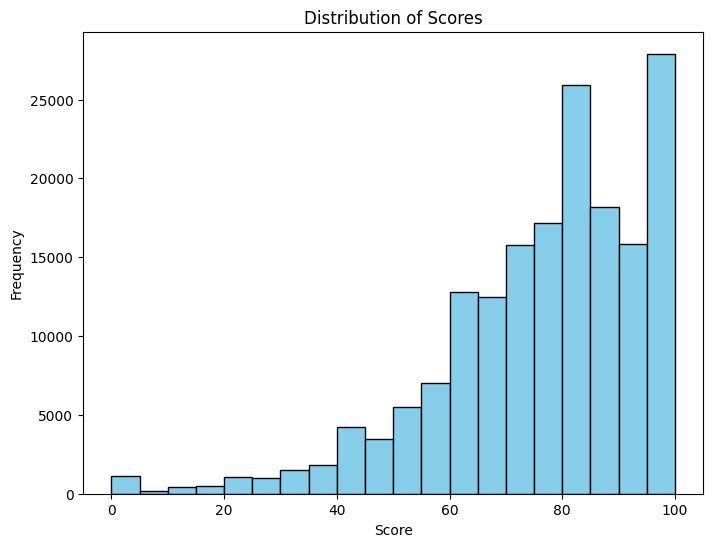

In [29]:
# Menampilkan grafik untuk distribusi skor
plt.figure(figsize=(8, 6)) #membuat sebuah figure (gambar) dengan ukuran 8x6 inch untuk menampilkan grafik.
plt.hist(df['score'], bins=20, color='skyblue', edgecolor='black')
#data yang akan digunakan untuk membuat histogram, yaitu nilai-nilai dari kolom 'score'. Bins mengatur interval sebanyak 20
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.show()


Distribusi score berdasarkan jumlah frekuensi. Hasilnya adalah histogram yang menggambarkan distribusi nilai ('scores') dalam DataFrame, dengan informasi tentang seberapa sering nilai muncul dalam setiap interval. Histogram adalah alat visual yang berguna untuk memahami distribusi data. Frekuensi tertinggi sebanyak >25000 didapatkan oleh score 100. Sedangkan frekuensi terendah yaitu <5000 didapatkan score 0-40

# studentInfo

In [3]:
# Membaca file data dari CSV dan disimpan dalam dataframe
df = pd.read_csv('studentInfo.csv')

# Fungsi DataFrame untuk menampilkan data dari urutan paling atas, fungsi ini berguna untuk memeriksa struktur data
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [4]:
# Menampilkan ringkasan informasi terkait  dataframe yang digunakan, berguna untuk memahami struktur dan spesifikasi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [5]:
# Mengisi missing values dengan perulangan loop dan diisi dengan mode dari setiap kolom
for col in df.columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
print(df.isnull().sum())

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64


In [6]:
# Menampilkan tipe dan struktur data guna mempermudah mengolah data
print(f"Data Types:\n{df.dtypes}")
print(f"\nRows and Columns:\n{df.shape}")
print(f"\nColumn Names:\n{df.columns}")
print(f"\nNull Values %:\n{df.apply(lambda x: sum(x.isnull()) / len(df))}")

Data Types:
code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object

Rows and Columns:
(32593, 12)

Column Names:
Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result'],
      dtype='object')

Null Values %:
code_module             0.0
code_presentation       0.0
id_student              0.0
gender                  0.0
region                  0.0
highest_education       0.0
imd_band                0.0
age_band                0.0
num_of_prev_attempts    0.0
studied_credits         0.0
disability              0.0


In [7]:
# Membagi kolom kolom pada dataframe menjadi 4 kategori berdasarkan tipe datanya
temp = (df.dtypes == 'object')
cat_cols = list(temp[temp].index)
print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")

temp = (df.dtypes == 'float64')
float64_cols = list(temp[temp].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

temp = (df.dtypes == 'int64')
int64_cols = list(temp[temp].index)
print(f"\n{len(int64_cols)} int features:\n{int64_cols}")

temp = (df.dtypes == np.number)
num_cols = list(temp[temp].index)
print(f"\n{len(num_cols)} numpy.number features::\n{num_cols}")
# Hasil dari kode ini adalah pengelompokan kolom dalam DataFrame ke dalam kategori berdasarkan jenis data mereka, yang dapat membantu dalam analisis dan pemrosesan data yang lebih lanjut.

9 Categorical features:
['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability', 'final_result']

0 float64 features:
[]

3 int features:
['id_student', 'num_of_prev_attempts', 'studied_credits']

0 numpy.number features::
[]


Text(0.5, 1.0, 'Distribution of Highest Education')

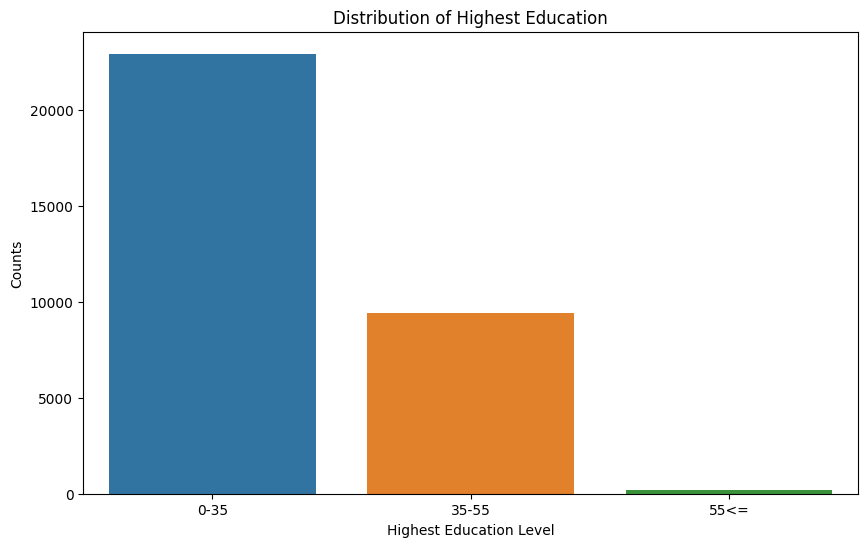

In [9]:
# Menampilkan grafik bar untuk feature 'highest_education'
education_counts = df['highest_education'].value_counts().reset_index()
education_counts = education_counts.rename(columns={"index": "highest_education", "highest_education":"counts"})
#untuk menghitung jumlah kemunculan kategori age_band yang kemudian hasilnya akan dikembalikan dlm dua kolom
plt.figure(figsize=(10, 6)) #untuk membuat grafik dengan ukuran 10x6 inch
chart = sns.barplot(x="highest_education", y="counts", data=education_counts) #Grafik ini memiliki 'age_band' di sumbu x dan 'counts' di sumbu y, dengan data yang diambil dari DataFrame 'education_counts'
chart.set_xticklabels(chart.get_xticklabels()) #Baris ini digunakan untuk menampilkan label sumbu x agar lebih mudah dibaca.
plt.xlabel('Highest Education Level')
plt.ylabel('Counts')
plt.title('Distribution of Highest Education')

Visualisasi yang saya pakai adalah grafik batang (bar chart) yang menunjukkan distribusi tingkat pendidikan tertinggi (Highest Education Level) dalam dataframe. Bar warna biru menunjukkan bahwa umur 0-35 memiliki jumlah sebanyak >20000. Kemudian bar warna orange menunjukkan warna 35-55 yang memiliki jumlah <10000. Yang terakhir bar warna hijau memiliki umur 55<= memiliki jumlah >0. Grafik ini akan membantu memvisualisasikan sebaran data dan melihat seberapa sering kategori tingkat pendidikan muncul dalam data.

# studentRegistration

In [58]:
# Membaca file data dari CSV dan disimpan dalam dataframe
df = pd.read_csv('studentRegistration.csv')

# Fungsi DataFrame untuk menampilkan data dari urutan paling atas, fungsi ini berguna untuk memeriksa struktur data
df.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [59]:
# Menampilkan ringkasan informasi terkait  dataframe yang digunakan, berguna untuk memahami struktur dan spesifikasi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [60]:
# Mengisi missing values dengan perulangan loop dan diisi dengan mode dari setiap kolom
for col in df.columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
print(df.isnull().sum())

code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    0
dtype: int64


In [61]:
# Menampilkan tipe dan struktur data guna mempermudah mengolah data
print(f"Data Types:\n{df.dtypes}")
print(f"\nRows and Columns:\n{df.shape}")
print(f"\nColumn Names:\n{df.columns}")
print(f"\nNull Values %:\n{df.apply(lambda x: sum(x.isnull()) / len(df))}")

Data Types:
code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object

Rows and Columns:
(32593, 5)

Column Names:
Index(['code_module', 'code_presentation', 'id_student', 'date_registration',
       'date_unregistration'],
      dtype='object')

Null Values %:
code_module            0.0
code_presentation      0.0
id_student             0.0
date_registration      0.0
date_unregistration    0.0
dtype: float64


In [62]:
# Membagi kolom kolom pada dataframe menjadi 4 kategori berdasarkan tipe datanya
temp = (df.dtypes == 'object')
cat_cols = list(temp[temp].index)
print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")

temp = (df.dtypes == 'float64')
float64_cols = list(temp[temp].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

temp = (df.dtypes == 'int64')
int64_cols = list(temp[temp].index)
print(f"\n{len(int64_cols)} int features:\n{int64_cols}")

temp = (df.dtypes == np.number)
num_cols = list(temp[temp].index)
print(f"\n{len(num_cols)} numpy.number features::\n{num_cols}")
# Hasil dari kode ini adalah pengelompokan kolom dalam DataFrame ke dalam kategori berdasarkan jenis data mereka, yang dapat membantu dalam analisis dan pemrosesan data yang lebih lanjut.

2 Categorical features:
['code_module', 'code_presentation']

2 float64 features:
['date_registration', 'date_unregistration']

1 int features:
['id_student']

2 numpy.number features::
['date_registration', 'date_unregistration']


# studentVle

In [63]:
# Membaca file data dari CSV dan disimpan dalam dataframe
df = pd.read_csv('studentVle.csv')

# Fungsi DataFrame untuk menampilkan data dari urutan paling atas, fungsi ini berguna untuk memeriksa struktur data
df.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400.0,546652.0,-10.0,4.0
1,AAA,2013J,28400.0,546652.0,-10.0,1.0
2,AAA,2013J,28400.0,546652.0,-10.0,1.0
3,AAA,2013J,28400.0,546614.0,-10.0,11.0
4,AAA,2013J,28400.0,546714.0,-10.0,1.0


In [64]:
# Menampilkan ringkasan informasi terkait  dataframe yang digunakan, berguna untuk memahami struktur dan spesifikasi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316357 entries, 0 to 2316356
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   code_module        object 
 1   code_presentation  object 
 2   id_student         float64
 3   id_site            float64
 4   date               float64
 5   sum_click          float64
dtypes: float64(4), object(2)
memory usage: 106.0+ MB


In [65]:
# Menampilkan tipe dan struktur data guna mempermudah mengolah data
print(f"Data Types:\n{df.dtypes}")
print(f"\nRows and Columns:\n{df.shape}")
print(f"\nColumn Names:\n{df.columns}")
print(f"\nNull Values %:\n{df.apply(lambda x: sum(x.isnull()) / len(df))}")

Data Types:
code_module           object
code_presentation     object
id_student           float64
id_site              float64
date                 float64
sum_click            float64
dtype: object

Rows and Columns:
(2316357, 6)

Column Names:
Index(['code_module', 'code_presentation', 'id_student', 'id_site', 'date',
       'sum_click'],
      dtype='object')

Null Values %:
code_module          0.000000e+00
code_presentation    0.000000e+00
id_student           4.317124e-07
id_site              4.317124e-07
date                 4.317124e-07
sum_click            4.317124e-07
dtype: float64


In [66]:
# Membagi kolom kolom pada dataframe menjadi 4 kategori berdasarkan tipe datanya
temp = (df.dtypes == 'object')
cat_cols = list(temp[temp].index)
print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")

temp = (df.dtypes == 'float64')
float64_cols = list(temp[temp].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

temp = (df.dtypes == 'int64')
int64_cols = list(temp[temp].index)
print(f"\n{len(int64_cols)} int features:\n{int64_cols}")

temp = (df.dtypes == np.number)
num_cols = list(temp[temp].index)
print(f"\n{len(num_cols)} numpy.number features::\n{num_cols}")
# Hasil dari kode ini adalah pengelompokan kolom dalam DataFrame ke dalam kategori berdasarkan jenis data mereka, yang dapat membantu dalam analisis dan pemrosesan data yang lebih lanjut.

2 Categorical features:
['code_module', 'code_presentation']

4 float64 features:
['id_student', 'id_site', 'date', 'sum_click']

0 int features:
[]

4 numpy.number features::
['id_student', 'id_site', 'date', 'sum_click']


# Vle

In [67]:
# Membaca file data dari CSV dan disimpan dalam dataframe
df = pd.read_csv('vle.csv')

# Fungsi DataFrame untuk menampilkan data dari urutan paling atas, fungsi ini berguna untuk memeriksa struktur data
df.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [68]:
# Menampilkan ringkasan informasi terkait  dataframe yang digunakan, berguna untuk memahami struktur dan spesifikasi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [69]:
# Mengisi missing values dengan perulangan loop dan diisi dengan mode dari setiap kolom
for col in df.columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
print(df.isnull().sum())

id_site              0
code_module          0
code_presentation    0
activity_type        0
week_from            0
week_to              0
dtype: int64


In [70]:
# Menampilkan tipe dan struktur data guna mempermudah mengolah data
print(f"Data Types:\n{df.dtypes}")
print(f"\nRows and Columns:\n{df.shape}")
print(f"\nColumn Names:\n{df.columns}")
print(f"\nNull Values %:\n{df.apply(lambda x: sum(x.isnull()) / len(df))}")

Data Types:
id_site                int64
code_module           object
code_presentation     object
activity_type         object
week_from            float64
week_to              float64
dtype: object

Rows and Columns:
(6364, 6)

Column Names:
Index(['id_site', 'code_module', 'code_presentation', 'activity_type',
       'week_from', 'week_to'],
      dtype='object')

Null Values %:
id_site              0.0
code_module          0.0
code_presentation    0.0
activity_type        0.0
week_from            0.0
week_to              0.0
dtype: float64


In [71]:
# Membagi kolom kolom pada dataframe menjadi 4 kategori berdasarkan tipe datanya
temp = (df.dtypes == 'object')
cat_cols = list(temp[temp].index)
print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")

temp = (df.dtypes == 'float64')
float64_cols = list(temp[temp].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

temp = (df.dtypes == 'int64')
int64_cols = list(temp[temp].index)
print(f"\n{len(int64_cols)} int features:\n{int64_cols}")

temp = (df.dtypes == np.number)
num_cols = list(temp[temp].index)
print(f"\n{len(num_cols)} numpy.number features::\n{num_cols}")
# Hasil dari kode ini adalah pengelompokan kolom dalam DataFrame ke dalam kategori berdasarkan jenis data mereka, yang dapat membantu dalam analisis dan pemrosesan data yang lebih lanjut.

3 Categorical features:
['code_module', 'code_presentation', 'activity_type']

2 float64 features:
['week_from', 'week_to']

1 int features:
['id_site']

2 numpy.number features::
['week_from', 'week_to']
